Author: Maha Alali

# Heatmap per Bedroom Difference - Updated for 2020

Using the gained/decreased/no change bedroom data, we can create a heat map to visualize the amount of bedrooms lost and gained based on if bedrooms_diff is postive or negative based on neighborhood.

Steps:
- 1- Make a new dataset including the get the corresponding long and lat from the SAM dataset, for each PID.
- 2- Load the GeoJSON file to understand the structure of the neighborhood boundaries data.
- 3- Convert the new datasets to GeoDataFrames: This involves using the latitude and longitude columns to create a geometry column necessary for spatial operations.
- 4- Spatially join these GeoDataFrames with the neighborhoods GeoDataFrame: This step assigns each property to a neighborhood based on its geographic coordinates.
- 5- Aggregate the bedroom differences by neighborhood: We'll sum the bedrooms_diff column within each neighborhood to understand the total change in the number of bedrooms.
- 6- Create and diplay a map

Step 1: We map each PID in each, decreased_bedrooms_data, increased_bedrooms_data and
unchanged_bedrooms_data to PARCEL for each property by merging the columns in the dataset.

In [97]:
import pandas as pd

increased_bedrooms_data = pd.read_csv('../Cleaned Bedroom Data/increased_bedrooms_data.csv')
decreased_bedrooms_data = pd.read_csv('../Cleaned Bedroom Data/decreased_bedrooms_data.csv')
unchanged_bedrooms_data = pd.read_csv('../Cleaned Bedroom Data/unchanged_bedrooms_data.csv')

display(increased_bedrooms_data.head())
display(decreased_bedrooms_data.head())
display(unchanged_bedrooms_data.head())

,PID,DATA_YEAR,LIVING_AREA,YR_REMODELLED,BED_ROOMS,REMODEL_YEAR,living_area_diff,bedrooms_diff
0,100028000,2019,3275.0,2015.0,8.0,2015.0,899.0,2.0
1,100035000,2020,2806.0,2018.0,5.0,2018.0,-14.0,2.0
2,100058000,2018,3651.0,2015.0,11.0,2015.0,-189.0,3.0
3,100105000,2018,3402.0,2016.0,8.0,2016.0,-275.0,2.0
4,100262000,2018,2722.0,2011.0,10.0,2011.0,-158.0,2.0


,PID,DATA_YEAR,LIVING_AREA,YR_REMODELLED,BED_ROOMS,REMODEL_YEAR,living_area_diff,bedrooms_diff
0,100163000,2019,1499.0,2017.0,3.0,2017.0,56.0,-1.0
1,101262000,2018,2991.0,2014.0,4.0,2014.0,0.0,-3.0
2,101893000,2018,4389.0,2015.0,7.0,2015.0,235.0,-2.0
3,102531000,2020,2314.0,2018.0,4.0,2018.0,0.0,-2.0
4,102531000,2022,2314.0,2019.0,4.0,2019.0,0.0,-2.0


,PID,DATA_YEAR,LIVING_AREA,YR_REMODELLED,BED_ROOMS,REMODEL_YEAR,living_area_diff,bedrooms_diff
0,100029000,2018,4475.0,2015.0,9.0,2015.0,18.0,0.0
1,100104000,2022,3308.0,2020.0,8.0,2020.0,0.0,0.0
2,100137000,2018,1197.0,2015.0,2.0,2015.0,0.0,0.0
3,100137000,2013,1197.0,1976.0,2.0,2017.0,0.0,0.0
4,100137000,2019,1197.0,2017.0,2.0,2017.0,0.0,0.0


In [98]:
increased_bedrooms_merged = pd.read_csv('../Cleaned Bedroom Data Merged/increased_bedrooms_merged.csv')
decreased_bedrooms_merged = pd.read_csv('../Cleaned Bedroom Data Merged/decreased_bedrooms_merged.csv')
unchanged_bedrooms_merged = pd.read_csv('../Cleaned Bedroom Data Merged/unchanged_bedrooms_merged.csv')

display(increased_bedrooms_merged.head())
display(decreased_bedrooms_merged.head())
display(unchanged_bedrooms_merged.head())

,PID,DATA_YEAR,LIVING_AREA,YR_REMODELLED,BED_ROOMS,REMODEL_YEAR,living_area_diff,bedrooms_diff,latitude,longitude
0,100028000,2019,3275.0,2015.0,8.0,2015.0,899.0,2.0,-71.030521,42.379799
1,100035000,2020,2806.0,2018.0,5.0,2018.0,-14.0,2.0,-71.031011,42.379549
2,100058000,2018,3651.0,2015.0,11.0,2015.0,-189.0,3.0,-71.029429,42.378775
3,100105000,2018,3402.0,2016.0,8.0,2016.0,-275.0,2.0,-71.029101,42.379919
4,100262000,2018,2722.0,2011.0,10.0,2011.0,-158.0,2.0,-71.027161,42.381209


,PID,DATA_YEAR,LIVING_AREA,YR_REMODELLED,BED_ROOMS,REMODEL_YEAR,living_area_diff,bedrooms_diff,latitude,longitude
0,100163000,2019,1499.0,2017.0,3.0,2017.0,56.0,-1.0,-71.029291,42.380639
1,101893000,2018,4389.0,2015.0,7.0,2015.0,235.0,-2.0,-71.006001,42.389059
2,102531000,2020,2314.0,2018.0,4.0,2018.0,0.0,-2.0,-71.038951,42.376979
3,102743000,2022,1368.0,2019.0,3.0,2019.0,-72.0,-1.0,-71.037711,42.380415
4,102925000,2013,1596.0,2003.0,2.0,2017.0,0.0,-4.0,-71.036041,42.378099


,PID,DATA_YEAR,LIVING_AREA,YR_REMODELLED,BED_ROOMS,REMODEL_YEAR,living_area_diff,bedrooms_diff,latitude,longitude
0,100029000,2018,4475.0,2015.0,9.0,2015.0,18.0,0.0,-71.030461,42.379709
1,100104000,2022,3308.0,2020.0,8.0,2020.0,0.0,0.0,-71.029261,42.379849
2,100137000,2018,1197.0,2015.0,2.0,2015.0,0.0,0.0,-71.029031,42.379679
3,100139000,2018,2563.0,2013.0,4.0,2013.0,-39.0,0.0,-71.029021,42.379519
4,100145000,2018,0.0,2015.0,5.0,2015.0,-2694.0,0.0,-71.029521,42.379319


Step 2: Load the GeoJSON file to understand the structure of the neighborhood boundaries data.

In [99]:
import geopandas as gpd

neighborhoods_gdf = gpd.read_file('../data/Census2020_BG_Neighborhoods/Census2020_BG_Neighborhoods.shp')


In [100]:
# Display the first few rows to verify the structure
display(neighborhoods_gdf)

,OBJECTID,BlockGr202,Shape_Leng,Shape_Area,geometry
0,1,Allston,35808.619278,4.154760e+07,"POLYGON ((758525.831 2959265.091, 758671.805 2..."
1,2,Back Bay,18815.103609,1.538724e+07,"POLYGON ((771539.219 2954877.239, 771575.861 2..."
2,3,Beacon Hill,11668.951169,7.891524e+06,"POLYGON ((774297.440 2956963.715, 774312.270 2..."
3,4,Brighton,47051.804654,7.658156e+07,"POLYGON ((754177.850 2955969.986, 754151.917 2..."
4,5,Charlestown,33910.754786,5.127021e+07,"POLYGON ((773132.501 2968902.714, 773021.919 2..."
5,6,Chinatown,10843.828683,3.436019e+06,"POLYGON ((775639.044 2953734.864, 775595.372 2..."
6,7,Dorchester,80692.139164,2.193038e+08,"POLYGON ((775867.212 2944875.352, 775903.995 2..."
7,8,Downtown,32767.370822,2.159010e+07,"MULTIPOLYGON (((773867.690 2953737.779, 773824..."
8,9,East Boston,79266.383121,1.948618e+08,"POLYGON ((790588.304 2971526.017, 790707.690 2..."
9,10,Fenway,101396.628071,4.281357e+07,"POLYGON ((756955.208 2961112.383, 757042.651 2..."


In [101]:
# Concatenate the datasets 
all_bedrooms_data = pd.concat([increased_bedrooms_merged, decreased_bedrooms_merged, unchanged_bedrooms_merged])

Step 3: Convert the new datasets to GeoDataFrames: This involves using the latitude and longitude columns to create a geometry column necessary for spatial operations.

In [102]:
from shapely.geometry import Point

# Swap the latitude and longitude values to create the Point geometry correctly
all_bedrooms_data['geometry'] = all_bedrooms_data.apply(
    lambda row: Point(float(row['latitude']), float(row['longitude'])),
    axis=1
)

# Correct the order when creating the Point objects
all_bedrooms_geo = gpd.GeoDataFrame(all_bedrooms_data, geometry='geometry')
all_bedrooms_geo.crs = "EPSG:4326"  # Set the CRS to WGS84

# Transform neighborhoods_gdf to match the CRS of all_bedrooms_geo
neighborhoods_gdf = neighborhoods_gdf.to_crs("EPSG:4326")


print(all_bedrooms_geo.crs)
print(neighborhoods_gdf.crs)

EPSG:4326
EPSG:4326


In [103]:
print(all_bedrooms_geo.head())


         PID  DATA_YEAR  LIVING_AREA  YR_REMODELLED  BED_ROOMS  REMODEL_YEAR  \
0  100028000       2019       3275.0         2015.0        8.0        2015.0   
1  100035000       2020       2806.0         2018.0        5.0        2018.0   
2  100058000       2018       3651.0         2015.0       11.0        2015.0   
3  100105000       2018       3402.0         2016.0        8.0        2016.0   
4  100262000       2018       2722.0         2011.0       10.0        2011.0   

   living_area_diff  bedrooms_diff   latitude  longitude  \
0             899.0            2.0 -71.030521  42.379799   
1             -14.0            2.0 -71.031011  42.379549   
2            -189.0            3.0 -71.029429  42.378775   
3            -275.0            2.0 -71.029101  42.379919   
4            -158.0            2.0 -71.027161  42.381209   

                     geometry  
0  POINT (-71.03052 42.37980)  
1  POINT (-71.03101 42.37955)  
2  POINT (-71.02943 42.37877)  
3  POINT (-71.02910 42.37992) 

In [104]:
print(all_bedrooms_geo.total_bounds)
print(neighborhoods_gdf.total_bounds)


[-71.17355063  42.23257865 -70.99845057  42.39263868]
[-71.191247  42.227911 -70.920101  42.404928]


Lets take a look at where the data is located.

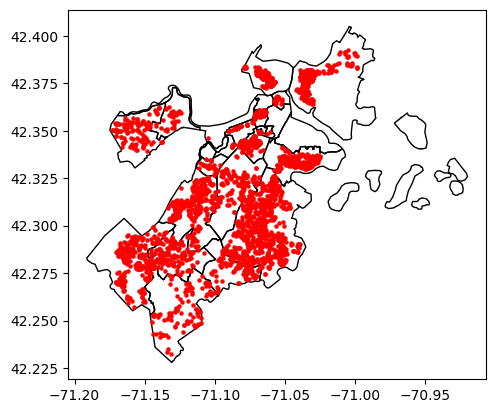

In [105]:
import matplotlib.pyplot as plt

ax = neighborhoods_gdf.plot(edgecolor='k', facecolor='none')
all_bedrooms_geo.plot(ax=ax, color='red', markersize=5)

plt.show()



Step 4: Spatially join these GeoDataFrames with the neighborhoods GeoDataFrame: This step assigns each property to a neighborhood based on its geographic coordinates.

In [106]:
# Perform a spatial join to associate bedrooms with neighborhoods
bedrooms_with_neighborhoods = gpd.sjoin(all_bedrooms_geo, neighborhoods_gdf, how='inner', predicate='intersects')


In [107]:
display(bedrooms_with_neighborhoods)

,PID,DATA_YEAR,LIVING_AREA,YR_REMODELLED,BED_ROOMS,REMODEL_YEAR,living_area_diff,bedrooms_diff,latitude,longitude,geometry,index_right,OBJECTID,BlockGr202,Shape_Leng,Shape_Area
0,100028000,2019,3275.0,2015.0,8.0,2015.0,899.0,2.0,-71.030521,42.379799,POINT (-71.03052 42.37980),8,9,East Boston,79266.383121,1.948618e+08
1,100035000,2020,2806.0,2018.0,5.0,2018.0,-14.0,2.0,-71.031011,42.379549,POINT (-71.03101 42.37955),8,9,East Boston,79266.383121,1.948618e+08
2,100058000,2018,3651.0,2015.0,11.0,2015.0,-189.0,3.0,-71.029429,42.378775,POINT (-71.02943 42.37877),8,9,East Boston,79266.383121,1.948618e+08
3,100105000,2018,3402.0,2016.0,8.0,2016.0,-275.0,2.0,-71.029101,42.379919,POINT (-71.02910 42.37992),8,9,East Boston,79266.383121,1.948618e+08
4,100262000,2018,2722.0,2011.0,10.0,2011.0,-158.0,2.0,-71.027161,42.381209,POINT (-71.02716 42.38121),8,9,East Boston,79266.383121,1.948618e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,401687000,2018,3458.0,2016.0,6.0,2016.0,0.0,0.0,-71.087751,42.341549,POINT (-71.08775 42.34155),9,10,Fenway,101396.628071,4.281357e+07
2110,2100082000,2019,4107.0,2017.0,6.0,2017.0,189.0,0.0,-71.105101,42.345949,POINT (-71.10510 42.34595),9,10,Fenway,101396.628071,4.281357e+07
332,305142000,2011,1722.0,2009.0,6.0,2009.0,0.0,0.0,-71.060822,42.349226,POINT (-71.06082 42.34923),5,6,Chinatown,10843.828683,3.436019e+06
333,305451000,2013,2262.0,2011.0,3.0,2011.0,126.0,0.0,-71.063200,42.348212,POINT (-71.06320 42.34821),5,6,Chinatown,10843.828683,3.436019e+06


Step 5: Aggregate the bedroom differences by neighborhood

In [108]:


# Aggregate bedroom differences by neighborhood
total_bedrooms_change_by_neighborhood = bedrooms_with_neighborhoods.groupby('BlockGr202')['bedrooms_diff'].sum().reset_index()

# Count how many points fall within each neighborhood
point_counts = gpd.sjoin(neighborhoods_gdf, all_bedrooms_geo, how='left', predicate='intersects').groupby('BlockGr202').size()

# Merge the point counts with the neighborhoods to see which ones have zero counts
neighborhoods_gdf = neighborhoods_gdf.merge(point_counts.rename('point_count'), left_on='BlockGr202', right_index=True, how='left')

# NaNs in the 'point_count' column indicate neighborhoods with no bedroom data points
# Replace NaNs with zero to reflect that there are no points in those neighborhoods
neighborhoods_gdf['point_count'] = neighborhoods_gdf['point_count'].fillna(0)

# Now proceed with the original merge, if neighborhoods with zero points are supposed to have NaNs in 'bedrooms_diff',
# then you know the NaNs are expected
neighborhoods_gdf = neighborhoods_gdf.merge(total_bedrooms_change_by_neighborhood, on='BlockGr202', how='left')

# Drop the duplicate columns

display(neighborhoods_gdf)

,OBJECTID,BlockGr202,Shape_Leng,Shape_Area,geometry,point_count,bedrooms_diff
0,1,Allston,35808.619278,4.154760e+07,"POLYGON ((-71.12123 42.36775, -71.12069 42.367...",30,16.0
1,2,Back Bay,18815.103609,1.538724e+07,"POLYGON ((-71.07315 42.35554, -71.07302 42.355...",49,-8.0
2,3,Beacon Hill,11668.951169,7.891524e+06,"POLYGON ((-71.06291 42.36123, -71.06286 42.360...",138,2.0
3,4,Brighton,47051.804654,7.658156e+07,"POLYGON ((-71.13737 42.35876, -71.13747 42.358...",127,63.0
4,5,Charlestown,33910.754786,5.127021e+07,"POLYGON ((-71.06700 42.39401, -71.06741 42.393...",221,22.0
5,6,Chinatown,10843.828683,3.436019e+06,"POLYGON ((-71.05801 42.35235, -71.05817 42.352...",2,0.0
6,7,Dorchester,80692.139164,2.193038e+08,"POLYGON ((-71.05733 42.32804, -71.05720 42.328...",679,235.0
7,8,Downtown,32767.370822,2.159010e+07,"MULTIPOLYGON (((-71.06456 42.35238, -71.06472 ...",1,NaN
8,9,East Boston,79266.383121,1.948618e+08,"POLYGON ((-71.00232 42.40094, -71.00188 42.400...",250,95.0
9,10,Fenway,101396.628071,4.281357e+07,"POLYGON ((-71.12701 42.37284, -71.12669 42.372...",10,-1.0


Step 6: Create and diplay a map

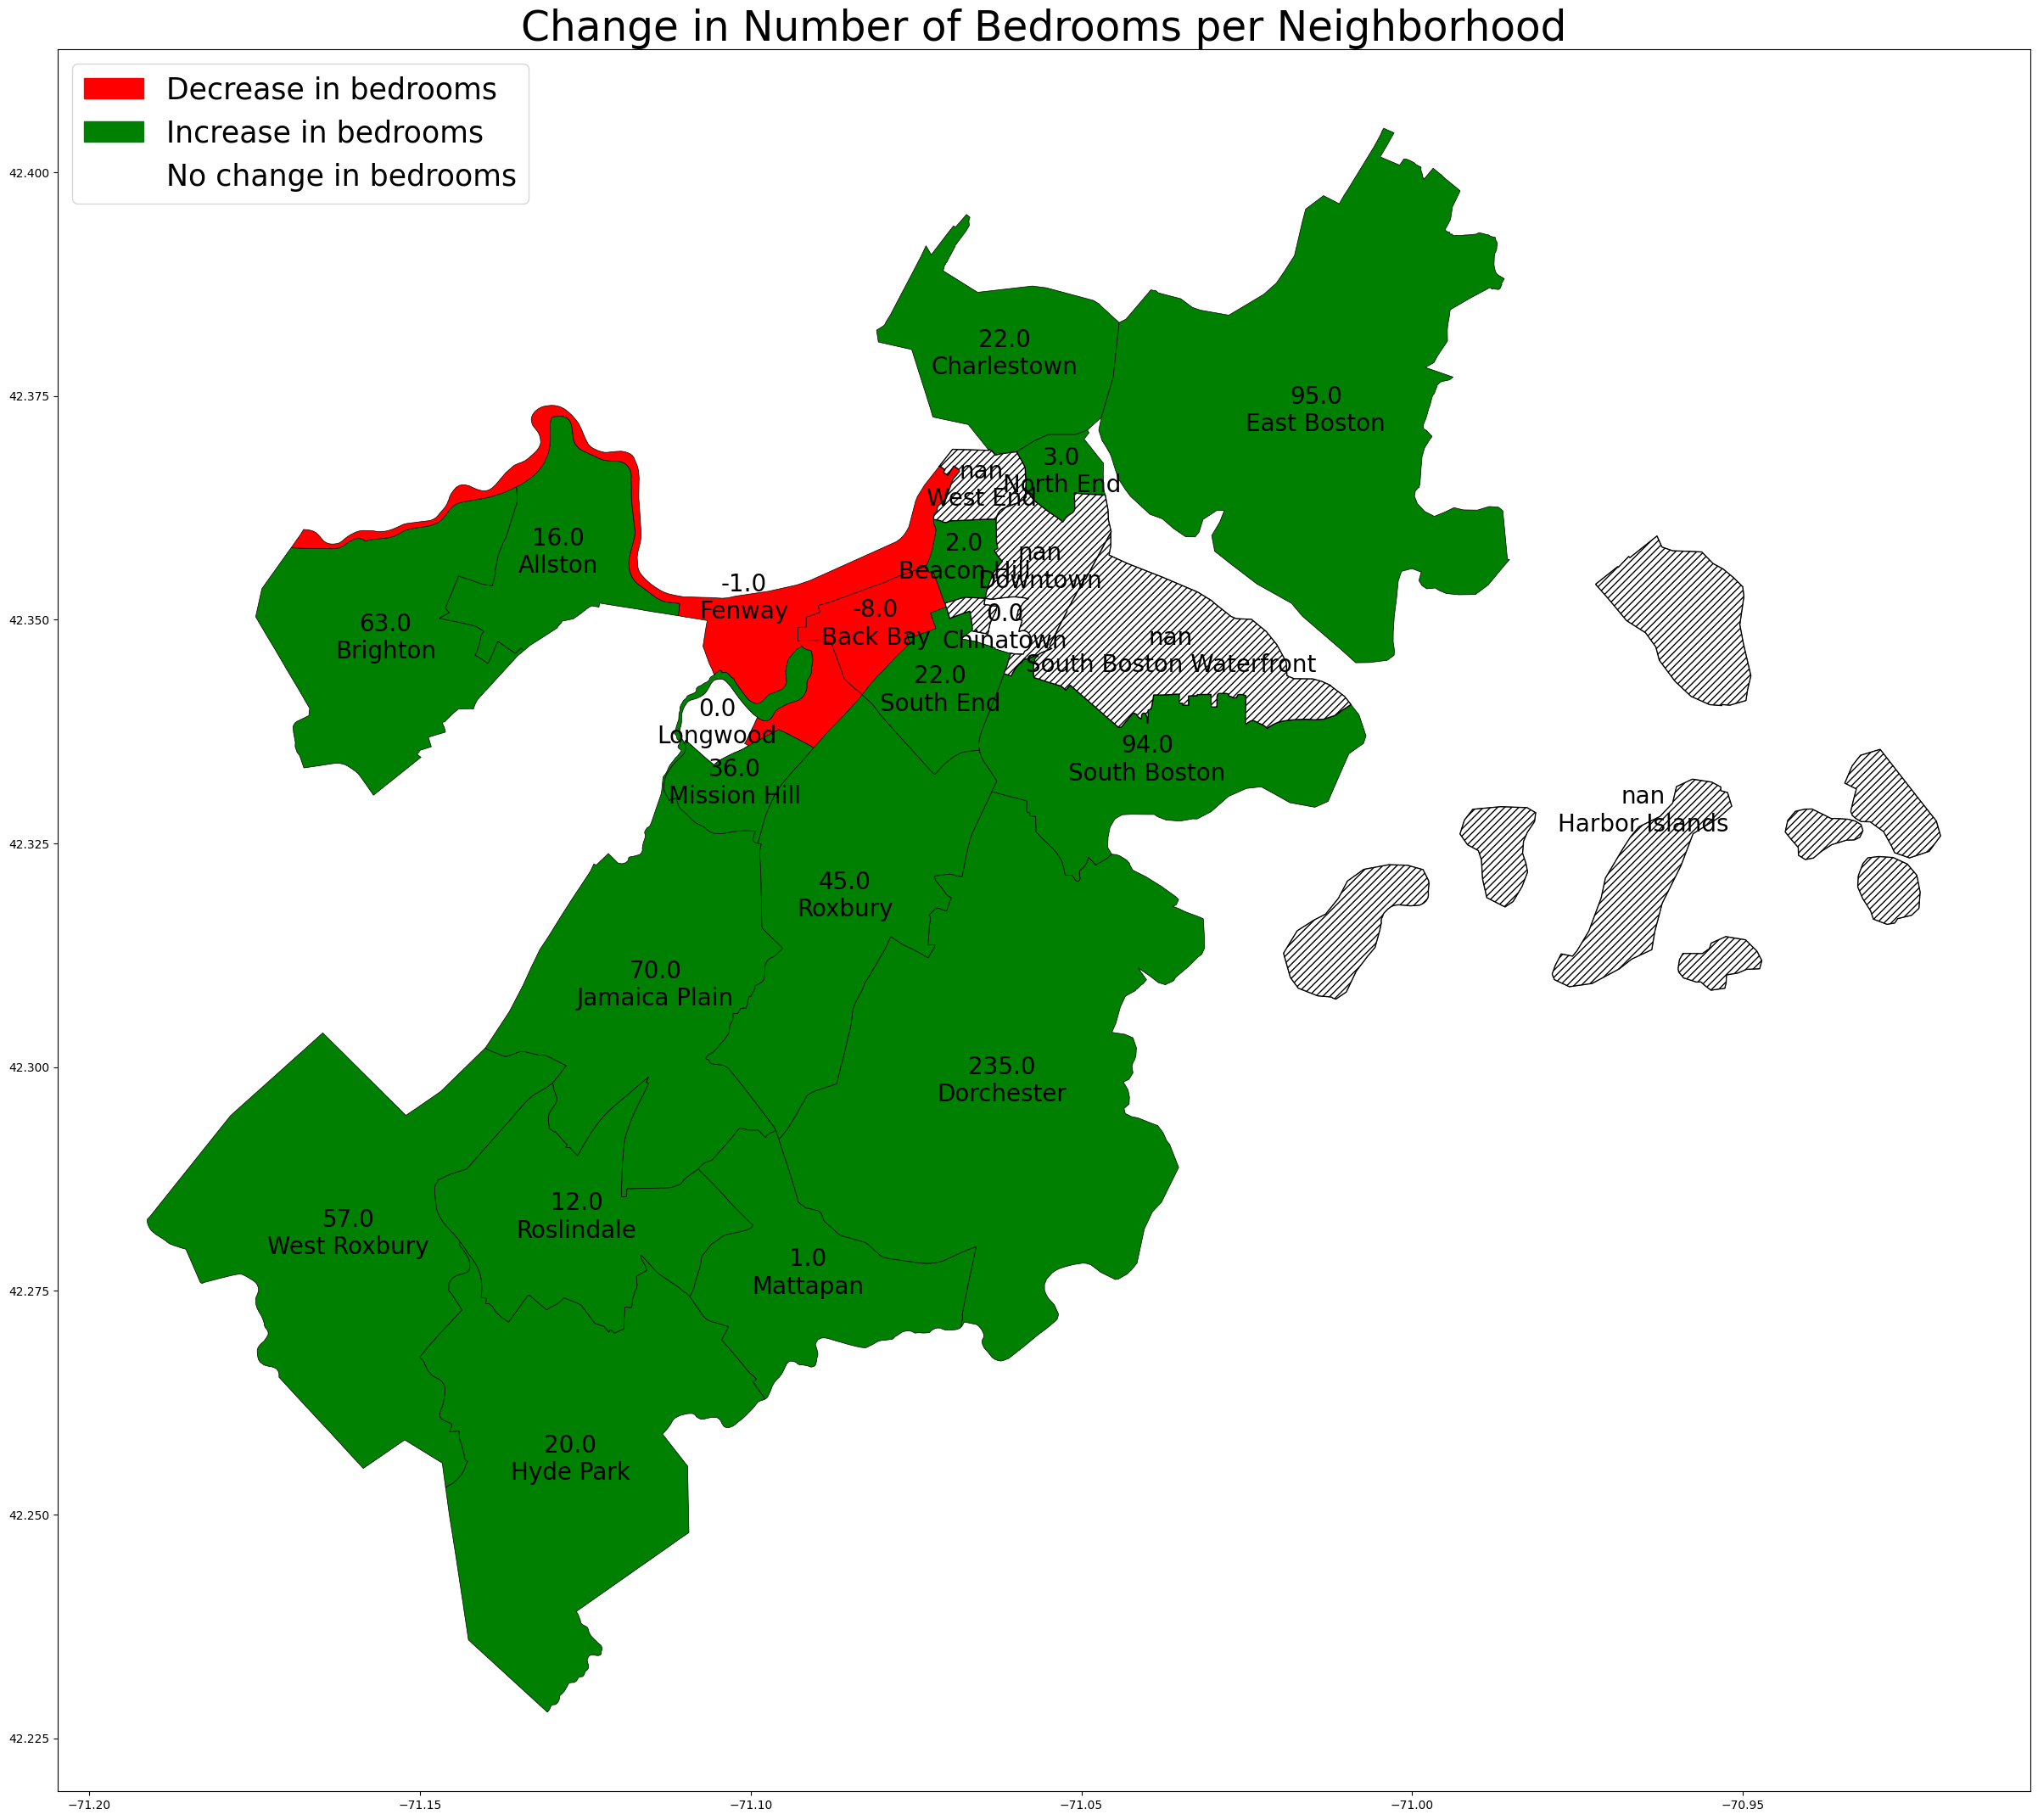

In [109]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Map bedroom_diff to colors: red for increase, green for decrease/no change
# Note: Assuming positive 'bedrooms_diff' means an increase and negative means a decrease. Adjust as necessary.
neighborhoods_gdf['color'] = neighborhoods_gdf['bedrooms_diff'].apply(lambda x: 'green' if x > 0 else 'red' if x < 0 else 'white')

fig, ax = plt.subplots(1, figsize=(30, 30))

# Plot using custom colors for increase, decrease, and no changes
neighborhoods_gdf.plot(ax=ax, color=neighborhoods_gdf['color'], edgecolor='black', linewidth=0.5)

# Add lines for areas with missing data (if any)
# Areas with NaN values in 'bedrooms_diff' are considered missing data
missing_data_areas = neighborhoods_gdf[neighborhoods_gdf['bedrooms_diff'].isna()]
missing_data_areas.plot(ax=ax, color="white", hatch="////", edgecolor="black", linewidth=1)

# Custom legend
red_patch = mpatches.Patch(color='red', label='Decrease in bedrooms')
green_patch = mpatches.Patch(color='green', label='Increase in bedrooms')
white_patch = mpatches.Patch(color='white', label='No change in bedrooms')
plt.legend(handles=[red_patch, green_patch, white_patch], loc='upper left', fontsize=25)

# Annotations for bedroom change and neighborhood name
for idx, row in neighborhoods_gdf.iterrows():
    label = f"{row['bedrooms_diff']}\n{row['BlockGr202']}"
    ax.annotate(label,
                xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                horizontalalignment='center', verticalalignment='center',
                fontsize=20, color='black')

plt.title('Change in Number of Bedrooms per Neighborhood', fontsize=35)
plt.show()
